# Phase 7: Final Visualization & Report Assets

**Goal:** Create publication-ready charts at 300 dpi for the final PDF report.

| # | Visual | Filename |
|---|--------|----------|
| 1 | Divergence Chart (ML vs Elo) | `Final_Insight_Chart.png` |
| 2 | Title Race Probability Table | `Title_Race_Table.png` |
| 3 | Feature Importance (Refined) | `Feature_Importance_Refined.png` |

All outputs saved to `Report_Assets/` at **300 dpi**.

In [1]:
# Ensure working directory is the project root perfectly across IDEs/Terminals
import os
import sys
try:
    if 'notebooks' in os.getcwd():
        project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
    else:
        project_root = os.getcwd()
    os.chdir(project_root)
    if project_root not in sys.path:
        sys.path.append(project_root)
except Exception:
    pass

# =============================================================================
# Cell 1: Setup & Load
# =============================================================================

import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.patches import Patch, FancyBboxPatch
from matplotlib import rcParams

warnings.filterwarnings('ignore')

# --- Establish consistent style ---
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Segoe UI', 'Arial', 'DejaVu Sans']
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

results_dir = os.path.join('data', 'results')
assets_dir = 'Report_Assets'
os.makedirs(assets_dir, exist_ok=True)

dpi = 300

# --- Load data ---
comparison = pd.read_csv(os.path.join(results_dir, 'ML_vs_Elo_Comparison.csv'))
elo_base   = pd.read_csv(os.path.join(results_dir, 'Baseline_Elo_Projection.csv'))

# --- Color palette ---
green = '#4bbf73'
red   = '#ff4b4b'
blue  = '#3498db'
dark  = '#1a1a2e'
gray  = '#b0b0b0'
league_colors = {
    'ENG-Premier League': '#3d195b',
    'ESP-La Liga':        '#ee8707',
    'GER-Bundesliga':     '#d20515',
    'ITA-Serie A':        '#024494',
    'FRA-Ligue 1':        '#091c3e',
}
league_short = {
    'ENG-Premier League': 'Premier League',
    'ESP-La Liga':        'La Liga',
    'GER-Bundesliga':     'Bundesliga',
    'ITA-Serie A':        'Serie A',
    'FRA-Ligue 1':        'Ligue 1',
}

print(f'Loaded comparison: {len(comparison)} teams')
print(f'Output directory: {assets_dir}/')
print(f'dpi: {dpi}')

Loaded comparison: 96 teams
Output directory: Report_Assets/
dpi: 300


Creating Divergence Chart...


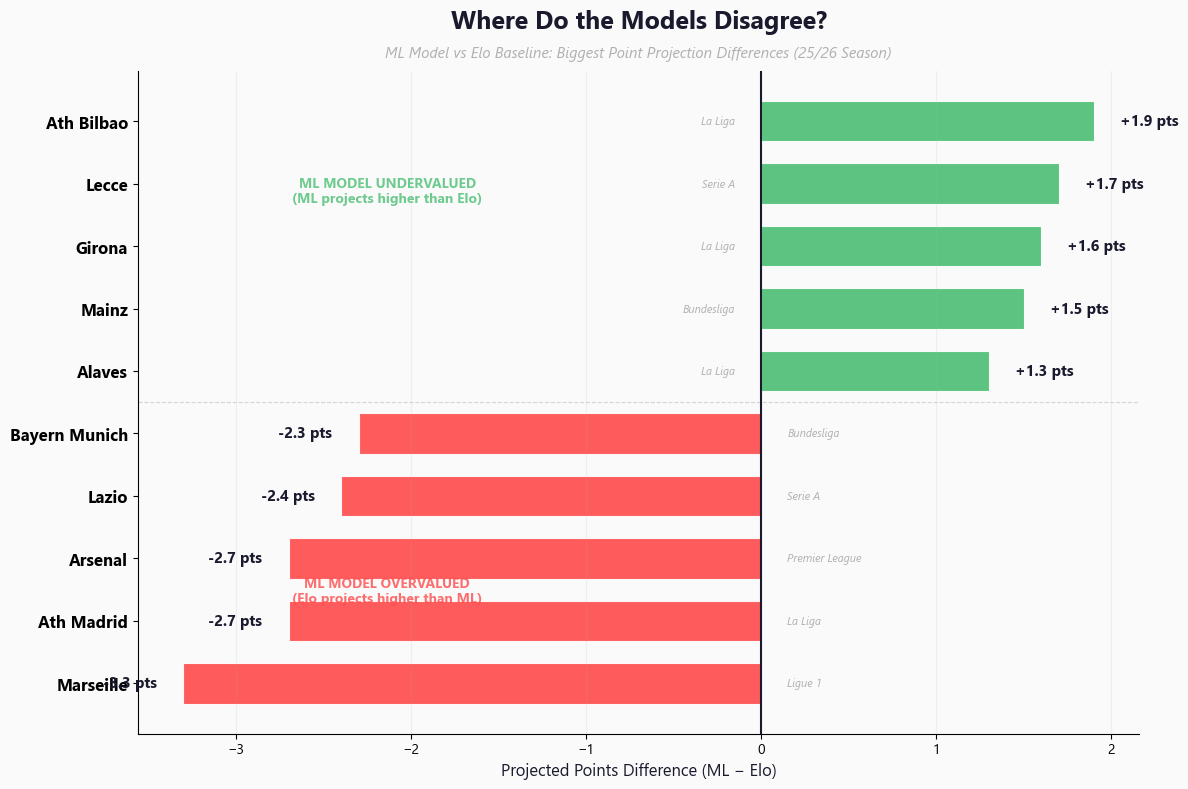

Saved: Report_Assets\Final_Insight_Chart.png (300 dpi)


In [2]:
# =============================================================================
# Cell 2: Visual 1 -- The Divergence Chart (THE MONEY SHOT)
# =============================================================================
# Top 5 teams ML rates higher + Bottom 5 teams ML rates lower.
# This answers: "What does the ML model see that Elo misses?"

print('Creating Divergence Chart...')

# --- Select top 5 and bottom 5 ---
top5 = comparison.nlargest(5, 'ml_vs_elo')[['team', 'league', 'ml_projected', 'elo_projected', 'ml_vs_elo']].copy()
bot5 = comparison.nsmallest(5, 'ml_vs_elo')[['team', 'league', 'ml_projected', 'elo_projected', 'ml_vs_elo']].copy()

# Combine and sort: negative at top, positive at bottom
divergence = pd.concat([bot5, top5]).sort_values('ml_vs_elo', ascending=True).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#fafafa')
ax.set_facecolor('#fafafa')

n = len(divergence)
y_pos = np.arange(n)

# Bar colors: green for ML higher, red for Elo higher
bar_colors = [green if v > 0 else red for v in divergence['ml_vs_elo']]

bars = ax.barh(y_pos, divergence['ml_vs_elo'], height=0.65,
               color=bar_colors, edgecolor='white', linewidth=0.8, alpha=0.9)

# --- Zero line ---
ax.axvline(x=0, color=dark, linewidth=1.5, zorder=3)

# --- Labels on bars ---
for i, (_, row) in enumerate(divergence.iterrows()):
    diff = row['ml_vs_elo']
    league_short = league_short.get(row['league'], row['league'])
    
    # Point label on the bar
    offset = 0.15 if diff > 0 else -0.15
    ha = 'left' if diff > 0 else 'right'
    ax.text(diff + offset, i, f'{diff:+.1f} pts',
            va='center', ha=ha, fontsize=11, fontweight='bold',
            color=dark)
    
    # League badge on the opposite side
    badge_x = -0.15 if diff > 0 else 0.15
    badge_ha = 'right' if diff > 0 else 'left'
    ax.text(badge_x, i, league_short,
            va='center', ha=badge_ha, fontsize=8,
            color=gray, style='italic')

# --- Team name labels ---
ax.set_yticks(y_pos)
ax.set_yticklabels(divergence['team'], fontsize=12, fontweight='bold')

# --- Dividing line between overrated and underrated ---
split_y = len(bot5) - 0.5
ax.axhline(y=split_y, color=gray, linewidth=0.8, linestyle='--', alpha=0.5)

# --- Section labels ---
ax.text(ax.get_xlim()[0] * 0.6, split_y + 3.2,
        'ML MODEL UNDERVALUED\n(ML projects higher than Elo)',
        fontsize=10, color=green, fontweight='bold', ha='center', alpha=0.8)
ax.text(ax.get_xlim()[0] * 0.6, split_y - 3.2,
        'ML MODEL OVERVALUED\n(Elo projects higher than ML)',
        fontsize=10, color=red, fontweight='bold', ha='center', alpha=0.8)

# --- Title ---
ax.set_title('Where Do the Models Disagree?\n',
             fontsize=18, fontweight='bold', color=dark, pad=10)
ax.text(0.5, 1.02, 'ML Model vs Elo Baseline: Biggest Point Projection Differences (25/26 Season)',
        transform=ax.transAxes, fontsize=11, color=gray, ha='center', style='italic')

ax.set_xlabel('Projected Points Difference (ML − Elo)', fontsize=12, color=dark)
ax.grid(axis='x', alpha=0.15)

plt.tight_layout()
path1 = os.path.join(assets_dir, 'Final_Insight_Chart.png')
plt.savefig(path1, dpi=dpi, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()
print(f'Saved: {path1} ({dpi} dpi)')

Creating Title Race Probability Table...


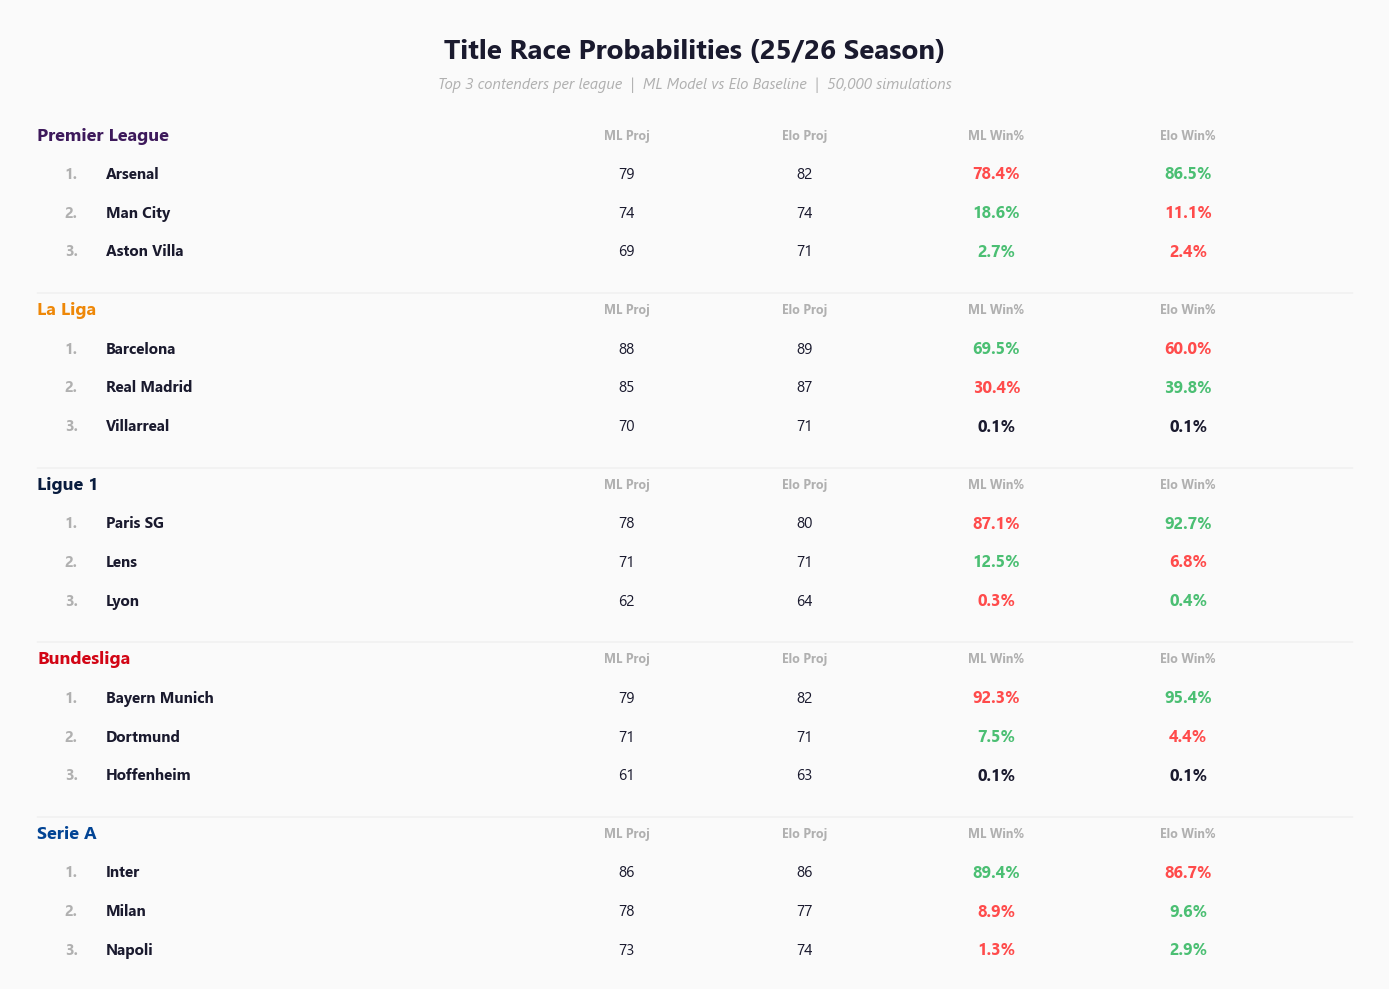

Saved: Report_Assets\Title_Race_Table.png (300 dpi)


In [3]:
# =============================================================================
# Cell 3: Visual 2 -- Title Race Probability Table
# =============================================================================
# Estimate title-winning probability using Monte Carlo sampling from
# the projected points distributions (mean + CI -> normal approx).

print('Creating Title Race Probability Table...')

n_title_sims = 50_000
np.random.seed(42)

title_rows = []

for league in sorted(comparison['league'].unique()):
    lg = comparison[comparison['league'] == league].copy()
    n_teams = len(lg)
    
    # --- Derive std from confidence intervals ---
    # p5 and p95 span 90% of the distribution -> ~1.645 std on each side
    # ML std
    lg['ml_std'] = (lg['ml_proj_p95'] - lg['ml_proj_p5']) / (2 * 1.645)
    lg['ml_std'] = lg['ml_std'].clip(lower=1.0)  # Floor to avoid zero std
    
    # Elo std (from baseline)
    elo_lg = elo_base[elo_base['league'] == league].copy()
    elo_lg['elo_std'] = (elo_lg['projected_p95'] - elo_lg['projected_p5']) / (2 * 1.645)
    elo_lg['elo_std'] = elo_lg['elo_std'].clip(lower=1.0)
    
    # Merge elo_std into lg
    lg = lg.merge(elo_lg[['team', 'elo_std']], on='team', how='left')
    lg['elo_std'] = lg['elo_std'].fillna(5.0)
    
    # --- Monte Carlo title race ---
    teams = lg['team'].values
    ml_means = lg['ml_projected'].values
    ml_stds  = lg['ml_std'].values
    elo_means = lg['elo_projected'].values
    elo_stds  = lg['elo_std'].values
    
    # Simulate final points n_title_sims times
    ml_sims  = np.random.normal(ml_means, ml_stds, size=(n_title_sims, n_teams))
    elo_sims = np.random.normal(elo_means, elo_stds, size=(n_title_sims, n_teams))
    
    # Count wins (who finishes 1st)
    ml_winners  = np.argmax(ml_sims, axis=1)
    elo_winners = np.argmax(elo_sims, axis=1)
    
    for i, team in enumerate(teams):
        ml_win_pct  = (ml_winners == i).mean() * 100
        elo_win_pct = (elo_winners == i).mean() * 100
        title_rows.append({
            'league': league,
            'team': team,
            'ml_projected': ml_means[i],
            'elo_projected': elo_means[i],
            'ml_title_pct': round(ml_win_pct, 1),
            'elo_title_pct': round(elo_win_pct, 1),
        })

title_df = pd.DataFrame(title_rows)

# --- Create the visual table (top 3 per league) ---
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('#fafafa')
ax.set_facecolor('#fafafa')
ax.axis('off')

# Header
ax.text(0.5, 0.97, 'Title Race Probabilities (25/26 Season)',
        transform=ax.transAxes, fontsize=20, fontweight='bold',
        ha='center', va='top', color=dark)
ax.text(0.5, 0.93, 'Top 3 contenders per league  |  ML Model vs Elo Baseline  |  50,000 simulations',
        transform=ax.transAxes, fontsize=11, ha='center', va='top',
        color=gray, style='italic')

y_start = 0.87
row_height = 0.04
league_gap = 0.02

y = y_start

for league in sorted(title_df['league'].unique()):
    lg = title_df[title_df['league'] == league].nlargest(3, 'ml_title_pct')
    color = league_colors.get(league, dark)
    league_name = league_short.get(league, league)
    
    # League header row
    ax.text(0.02, y, league_name, transform=ax.transAxes,
            fontsize=13, fontweight='bold', color=color, va='center')
    
    # Column headers
    ax.text(0.45, y, 'ML Proj', transform=ax.transAxes,
            fontsize=9, fontweight='bold', color=gray, ha='center', va='center')
    ax.text(0.58, y, 'Elo Proj', transform=ax.transAxes,
            fontsize=9, fontweight='bold', color=gray, ha='center', va='center')
    ax.text(0.72, y, 'ML Win%', transform=ax.transAxes,
            fontsize=9, fontweight='bold', color=gray, ha='center', va='center')
    ax.text(0.86, y, 'Elo Win%', transform=ax.transAxes,
            fontsize=9, fontweight='bold', color=gray, ha='center', va='center')
    
    y -= row_height
    
    for rank, (_, row) in enumerate(lg.iterrows(), 1):
        # Rank + Team name
        ax.text(0.04, y, f'{rank}.', transform=ax.transAxes,
                fontsize=11, color=gray, va='center', fontweight='bold')
        ax.text(0.07, y, row['team'], transform=ax.transAxes,
                fontsize=11, color=dark, va='center', fontweight='bold')
        
        # Points
        ax.text(0.45, y, f'{row["ml_projected"]:.0f}', transform=ax.transAxes,
                fontsize=11, color=dark, ha='center', va='center')
        ax.text(0.58, y, f'{row["elo_projected"]:.0f}', transform=ax.transAxes,
                fontsize=11, color=dark, ha='center', va='center')
        
        # Win percentages with color coding
        ml_color = green if row['ml_title_pct'] > row['elo_title_pct'] else red if row['ml_title_pct'] < row['elo_title_pct'] else dark
        ax.text(0.72, y, f'{row["ml_title_pct"]:.1f}%', transform=ax.transAxes,
                fontsize=12, color=ml_color, ha='center', va='center', fontweight='bold')
        elo_color = green if row['elo_title_pct'] > row['ml_title_pct'] else red if row['elo_title_pct'] < row['ml_title_pct'] else dark
        ax.text(0.86, y, f'{row["elo_title_pct"]:.1f}%', transform=ax.transAxes,
                fontsize=12, color=elo_color, ha='center', va='center', fontweight='bold')
        
        y -= row_height
    
    # Separator line
    y -= league_gap * 0.3
    ax.plot([0.02, 0.98], [y + league_gap * 0.15, y + league_gap * 0.15],
            color=gray, linewidth=0.3, alpha=0.5, transform=ax.transAxes)
    y -= league_gap * 0.7

plt.tight_layout()
path2 = os.path.join(assets_dir, 'Title_Race_Table.png')
plt.savefig(path2, dpi=dpi, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()
print(f'Saved: {path2} ({dpi} dpi)')

Creating Refined Feature Importance Chart...


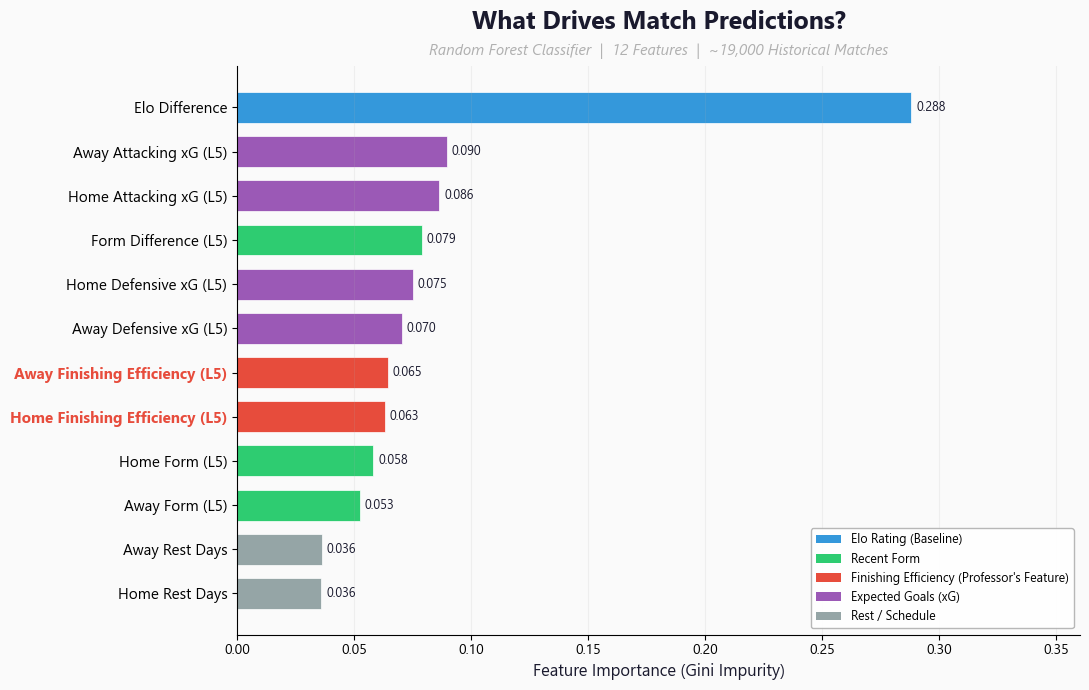

Saved: Report_Assets\Feature_Importance_Refined.png (300 dpi)


In [4]:
# =============================================================================
# Cell 4: Visual 3 -- Feature Importance (Refined for Report)
# =============================================================================
# Re-train a quick RF to extract importances, then make a polished chart
# that highlights the Professor's features.

print('Creating Refined Feature Importance Chart...')

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

processed_dir = os.path.join('data', 'processed')
training = pd.read_csv(os.path.join(processed_dir, 'model_training_engineered.csv'), low_memory=False)

features = [
    'elo_diff',
    'home_form_l5',
    'away_form_l5',
    'form_diff_l5',
    'home_finishing_efficiency_l5',
    'away_finishing_efficiency_l5',
    'home_attacking_xg_l5',
    'away_attacking_xg_l5',
    'home_defensive_xg_l5',
    'away_defensive_xg_l5',
    'home_rest_days',
    'away_rest_days',
]

labels = [
    'Elo Difference',
    'Home Form (L5)',
    'Away Form (L5)',
    'Form Difference (L5)',
    'Home Finishing Efficiency (L5)',
    'Away Finishing Efficiency (L5)',
    'Home Attacking xG (L5)',
    'Away Attacking xG (L5)',
    'Home Defensive xG (L5)',
    'Away Defensive xG (L5)',
    'Home Rest Days',
    'Away Rest Days',
]

target_map = {'A': 0, 'D': 1, 'H': 2}

model_data = training.dropna(subset=['FTR']).copy()
model_data['y'] = model_data['FTR'].map(target_map)
model_data = model_data.dropna(subset=features + ['y'])

X = model_data[features]
y = model_data['y']

imp = SimpleImputer(strategy='median')
X_imp = imp.fit_transform(X)

rf = RandomForestClassifier(n_estimators=500, max_depth=12, min_samples_split=20,
                            min_samples_leaf=10, max_features='sqrt',
                            class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_imp, y)

importances = rf.feature_importances_
indices = np.argsort(importances)

# --- Color scheme: highlight Professor's features ---
def get_color(feature_name):
    if 'finishing' in feature_name:
        return '#e74c3c'   # Red - Professor's feature (POP!)
    elif 'form' in feature_name:
        return '#2ecc71'   # Green - Form
    elif 'elo' in feature_name:
        return '#3498db'   # Blue - Elo baseline
    elif 'xg' in feature_name or 'attack' in feature_name or 'defen' in feature_name:
        return '#9b59b6'   # Purple - xG metrics
    else:
        return '#95a5a6'   # Gray - Other

colors = [get_color(features[i]) for i in indices]

fig, ax = plt.subplots(figsize=(11, 7))
fig.patch.set_facecolor('#fafafa')
ax.set_facecolor('#fafafa')

bars = ax.barh(range(len(indices)), importances[indices],
               color=colors, edgecolor='white', linewidth=0.5, height=0.7)

# --- Add value labels ---
for i, (idx, imp_val) in enumerate(zip(indices, importances[indices])):
    ax.text(imp_val + 0.002, i, f'{imp_val:.3f}',
            va='center', fontsize=9, color=dark)

ax.set_yticks(range(len(indices)))
ax.set_yticklabels([labels[i] for i in indices], fontsize=11)

# Bold the Professor's features in ytick labels
for i, idx in enumerate(indices):
    if 'finishing' in features[idx]:
        ax.get_yticklabels()[i].set_fontweight('bold')
        ax.get_yticklabels()[i].set_color('#e74c3c')

ax.set_xlabel('Feature Importance (Gini Impurity)', fontsize=12, color=dark)
ax.set_title('What Drives Match Predictions?\n',
             fontsize=18, fontweight='bold', color=dark)
ax.text(0.5, 1.02, 'Random Forest Classifier  |  12 Features  |  ~19,000 Historical Matches',
        transform=ax.transAxes, fontsize=11, ha='center', color=gray, style='italic')

# Legend
legend_elements = [
    Patch(facecolor='#3498db', label='Elo Rating (Baseline)'),
    Patch(facecolor='#2ecc71', label='Recent Form'),
    Patch(facecolor='#e74c3c', label='Finishing Efficiency (Professor\'s Feature)'),
    Patch(facecolor='#9b59b6', label='Expected Goals (xG)'),
    Patch(facecolor='#95a5a6', label='Rest / Schedule'),
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=9,
          framealpha=0.9, edgecolor=gray)

ax.grid(axis='x', alpha=0.15)
ax.set_xlim(0, importances.max() * 1.25)

plt.tight_layout()
path3 = os.path.join(assets_dir, 'Feature_Importance_Refined.png')
plt.savefig(path3, dpi=dpi, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()
print(f'Saved: {path3} ({dpi} dpi)')

In [5]:
# =============================================================================
# Cell 5: Report Asset Summary
# =============================================================================

print('PHASE 7 COMPLETE -- REPORT assets')
print('=' * 55)

import glob

assets = glob.glob(os.path.join(assets_dir, '*.png'))
print(f'\n  Output directory: {assets_dir}/')
print(f'  Total assets: {len(assets)}')
print(f'  dpi: {dpi}')
print(f'')

for f in sorted(assets):
    size_kb = os.path.getsize(f) / 1024
    print(f'  [{size_kb:>7.0f} KB]  {os.path.basename(f)}')

print(f'\n  CSV outputs in {results_dir}/:')
csvs = glob.glob(os.path.join(results_dir, '*.csv'))
for f in sorted(csvs):
    size_kb = os.path.getsize(f) / 1024
    print(f'  [{size_kb:>7.0f} KB]  {os.path.basename(f)}')

print(f'\n  All charts are 300 dpi, PDF-report ready.')
print(f'  Phase 7 complete.')

PHASE 7 COMPLETE -- REPORT assets

  Output directory: Report_Assets/
  Total assets: 3
  dpi: 300

  [    306 KB]  Feature_Importance_Refined.png
  [    266 KB]  Final_Insight_Chart.png
  [    418 KB]  Title_Race_Table.png

  CSV outputs in data\results/:
  [      8 KB]  Baseline_Elo_Projection.csv
  [      9 KB]  ML_vs_Elo_Comparison.csv

  All charts are 300 dpi, PDF-report ready.
  Phase 7 complete.
